Score = 81.6%

In [1]:
from keras.models import Sequential
from keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(2)

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train.shape

(50000, 32, 32, 3)

IL SERA PEUT ETRE NECESSAIRE D'ANNULER LA LIGNE DE CODE CI DESSOUS

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
INPUT_SHAPE = (32, 32, 3)
# get the VGG19 model
vgg_layers = VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

80142336/80134624 [==============================] - 2s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [8]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f026ad42b38> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f026a2b3160> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f026a2b3470> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f026a2b3898> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269a88588> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269a960b8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0269a96828> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269a9d048> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269a9de80> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269aa8208> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0269aa8b70> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f020e087

In [9]:
# define sequential model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(Flatten())

# add dense layers with some dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))

# add output layer
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [10]:
EPOCHS = 15

#es_callback = EarlyStopping(monitor='val_loss', patience=2, 
                                               #restore_best_weights=True,
                                               #verbose=1)

history = model.fit(X_train, y_train,
                    batch_size=32, 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)
# A FAIRE CHANGER A 128 BATCH SIZE, 50 EPOCHS ET PATIENCE 5
# TO CATEGORICAL POUR TARGET LABEL?

# J'AI RETIRER CALLBACKS DU MODEL.FIT "callbacks=[es_callback]""

Epoch 1/15
1407/1407 [==============================] - 32s 23ms/step - loss: 1.1803 - accuracy: 0.6013 - val_loss: 0.7630 - val_accuracy: 0.7456
Epoch 2/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7125 - accuracy: 0.7686 - val_loss: 0.5863 - val_accuracy: 0.7978
Epoch 3/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.5607 - accuracy: 0.8186 - val_loss: 0.5425 - val_accuracy: 0.8212
Epoch 4/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.4557 - accuracy: 0.8520 - val_loss: 0.5167 - val_accuracy: 0.8310
Epoch 5/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.3669 - accuracy: 0.8820 - val_loss: 0.5005 - val_accuracy: 0.8422
Epoch 6/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.2881 - accuracy: 0.9060 - val_loss: 0.5435 - val_accuracy: 0.8416
Epoch 7/15
1407/1407 [==============================] - 32s 23ms/step - loss: 0.2247 - accuracy: 0.9289 - val_loss: 0.5214 -

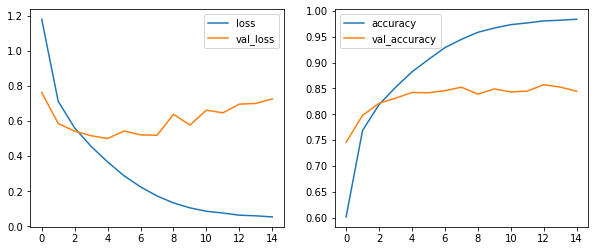

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [12]:
class_names =['Ship','Aeroplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Truck']

In [13]:
predictions = model.predict(X_test)
predictions[:5]

array([[9.47658737e-06, 5.91706021e-06, 4.84783814e-05, 9.98970866e-01,
        1.54427235e-05, 9.08179849e-04, 2.24638661e-05, 9.51914990e-06,
        3.71434567e-06, 6.07076709e-06],
       [3.22160929e-07, 4.16139756e-07, 4.83930620e-08, 5.78937289e-08,
        9.08404996e-09, 1.81868898e-09, 1.80375554e-08, 2.04374651e-09,
        9.99998927e-01, 2.68148085e-07],
       [3.46376491e-03, 4.64463383e-01, 9.56492440e-04, 9.71794478e-04,
        1.12230045e-04, 7.90386635e-04, 5.76556078e-04, 2.03855248e-04,
        5.26036799e-01, 2.42472952e-03],
       [9.99866724e-01, 6.69295378e-06, 3.54350486e-05, 8.71607244e-06,
        7.98984729e-06, 2.53125609e-06, 8.43744056e-06, 9.32697822e-06,
        3.46268753e-05, 1.96356250e-05],
       [5.85316457e-06, 3.17990016e-05, 5.25975076e-04, 1.52100751e-04,
        3.01853637e-04, 2.51404035e-05, 9.98905420e-01, 1.12767739e-05,
        5.20613548e-06, 3.52548595e-05]], dtype=float32)

In [14]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:200]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 3, 2,
       4, 9, 4, 3, 4, 0, 9, 6, 6, 5, 2, 2, 9, 8, 4, 1, 9, 5, 4, 6, 7, 6,
       0, 9, 3, 3, 7, 6, 9, 8, 9, 3, 8, 8, 7, 7, 5, 6, 7, 5, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 0,
       8, 9, 0, 6, 8, 6, 4, 6, 6, 0, 0, 7, 7, 5, 6, 3, 1, 1, 3, 6, 8, 7,
       7, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 2, 8, 3, 6, 2, 4, 1,
       8, 9, 1, 2, 9, 7, 2, 8, 6, 5, 6, 3, 8, 2, 6, 6, 5, 2, 8, 9, 6, 0,
       0, 5, 2, 9, 3, 4, 2, 1, 3, 6, 2, 2, 8, 6, 5, 0, 9, 0, 9, 8, 9, 9,
       3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 2, 8, 5, 8, 0, 1, 7, 2, 8, 8,
       7, 8])

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(y_test, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(y_test, prediction_labels), index=class_names, columns=class_names)


              precision    recall  f1-score   support

        Ship       0.92      0.84      0.88      1000
   Aeroplane       0.89      0.94      0.91      1000
  Automobile       0.70      0.88      0.78      1000
        Bird       0.72      0.63      0.67      1000
         Cat       0.84      0.79      0.81      1000
        Deer       0.78      0.75      0.76      1000
         Dog       0.90      0.84      0.87      1000
        Frog       0.85      0.91      0.88      1000
       Horse       0.91      0.94      0.92      1000
       Truck       0.91      0.88      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



,Ship,Aeroplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Truck
Ship,843,13,40,14,15,3,1,8,46,17
Aeroplane,9,940,2,3,2,1,0,0,11,32
Automobile,24,1,878,17,22,15,22,14,5,2
Bird,4,7,78,633,47,134,40,39,9,9
Cat,1,2,98,21,788,17,17,53,2,1
Deer,3,4,51,115,28,749,10,36,2,2
Dog,3,11,61,38,14,18,839,6,6,4
Frog,5,3,22,18,16,24,0,907,1,4
Horse,16,9,10,9,3,0,0,0,939,14
Truck,12,66,8,9,1,5,0,3,16,880


Je n'obtiens qu'une accuracy de 84%

In [16]:
EPOCHS = 5
model.fit(X_test, y_test,
                    batch_size=32, 
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/5
313/313 [==============================] - 7s 22ms/step - loss: 0.5538 - accuracy: 0.8359
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 0.3208 - accuracy: 0.9029
Epoch 3/5
313/313 [==============================] - 7s 22ms/step - loss: 0.1883 - accuracy: 0.9466
Epoch 4/5
313/313 [==============================] - 7s 22ms/step - loss: 0.1189 - accuracy: 0.9643
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 0.0759 - accuracy: 0.9792


### Save model

In [17]:
# save model and architecture to single file
model.save("modelVGG19gc.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [19]:
test_data.shape

(2000, 3072)

In [21]:
#x_test_data = test_data.astype('float32')
test_data /= 255
test_data.shape

(2000, 3072)

In [22]:
df = test_data.rename_axis('ID').values
dff = df.reshape(2000,32,32,3)
model.predict(dff)

array([[1.4021723e-05, 2.0537693e-06, 9.9981993e-01, ..., 6.3232142e-06,
        1.4420909e-05, 2.9276152e-06],
       [5.5198202e-06, 8.5612629e-07, 1.6742048e-05, ..., 4.6297459e-06,
        3.0777826e-06, 1.5488524e-06],
       [1.9329989e-06, 3.7643136e-07, 1.2747206e-06, ..., 9.9998093e-01,
        1.9813662e-07, 1.8636570e-07],
       ...,
       [7.4834825e-04, 3.3771817e-04, 9.5733559e-01, ..., 1.4447506e-03,
        7.4324937e-04, 2.5794154e-04],
       [2.6274420e-04, 2.2601376e-04, 1.3195756e-03, ..., 1.1001042e-03,
        1.5327064e-04, 1.4085940e-04],
       [1.4579043e-05, 1.1265183e-06, 9.8853125e-05, ..., 9.3806724e-05,
        3.5029366e-06, 1.0655376e-05]], dtype=float32)

In [23]:
pred_real = model.predict(dff)

In [24]:
pred_real[:20]

array([[1.40217226e-05, 2.05376932e-06, 9.99819934e-01, 6.95938797e-05,
        2.54404022e-05, 1.54511017e-05, 2.97314691e-05, 6.32321417e-06,
        1.44209089e-05, 2.92761524e-06],
       [5.51982021e-06, 8.56126292e-07, 1.67420476e-05, 9.99832273e-01,
        8.39285076e-06, 1.13331371e-04, 1.36499275e-05, 4.62974594e-06,
        3.07778259e-06, 1.54885242e-06],
       [1.93299888e-06, 3.76431359e-07, 1.27472060e-06, 9.42004647e-07,
        4.46758850e-06, 9.60219131e-06, 1.14961530e-07, 9.99980927e-01,
        1.98136618e-07, 1.86365696e-07],
       [2.40976822e-10, 1.77357313e-11, 1.03818681e-11, 5.62849697e-11,
        8.31577342e-12, 7.82091338e-14, 3.12096789e-12, 7.55049099e-14,
        1.00000000e+00, 9.26076660e-10],
       [4.76374362e-06, 1.19978849e-05, 1.19057775e-03, 3.99606040e-04,
        1.47002502e-04, 3.58301040e-05, 9.98182833e-01, 6.17532851e-06,
        7.12322435e-06, 1.39183867e-05],
       [6.04056477e-05, 9.95617986e-01, 1.93610122e-05, 4.67694335e-05,
   

In [25]:
pred_real = np.argmax(pred_real, axis=1)

In [26]:
pred_real[:1000]

array([2, 3, 7, 8, 6, 1, 3, 7, 3, 5, 8, 1, 4, 1, 3, 7, 0, 0, 7, 6, 5, 9,
       4, 8, 4, 0, 8, 7, 0, 7, 7, 3, 2, 4, 2, 0, 6, 4, 4, 4, 7, 2, 7, 1,
       4, 3, 5, 2, 4, 4, 3, 8, 7, 5, 8, 1, 1, 7, 1, 0, 5, 1, 7, 6, 1, 1,
       9, 8, 3, 1, 6, 6, 9, 6, 2, 0, 4, 3, 4, 8, 4, 5, 8, 9, 1, 7, 3, 6,
       3, 4, 3, 9, 9, 8, 9, 0, 0, 7, 1, 6, 8, 3, 2, 7, 4, 9, 4, 8, 3, 0,
       9, 0, 0, 0, 1, 7, 6, 5, 0, 2, 9, 6, 1, 0, 6, 3, 7, 0, 1, 8, 4, 8,
       3, 8, 3, 7, 9, 0, 9, 6, 7, 0, 5, 4, 4, 6, 4, 8, 2, 0, 2, 4, 2, 8,
       5, 5, 5, 5, 2, 4, 5, 2, 9, 8, 7, 3, 6, 1, 8, 1, 2, 3, 9, 2, 1, 6,
       0, 2, 3, 7, 6, 7, 2, 5, 2, 3, 4, 7, 4, 3, 4, 8, 0, 5, 0, 0, 4, 6,
       8, 1, 8, 2, 4, 5, 8, 0, 1, 0, 0, 3, 2, 8, 1, 5, 6, 8, 2, 4, 1, 5,
       7, 4, 4, 7, 3, 7, 3, 0, 3, 7, 7, 6, 3, 1, 9, 8, 8, 8, 0, 7, 9, 7,
       2, 5, 2, 4, 3, 4, 6, 1, 8, 8, 0, 9, 6, 5, 3, 8, 0, 2, 4, 8, 2, 9,
       8, 3, 0, 1, 0, 2, 8, 8, 8, 9, 5, 6, 1, 6, 3, 9, 0, 7, 3, 1, 4, 0,
       3, 5, 1, 4, 7, 4, 0, 1, 0, 1, 3, 5, 9, 2, 2,

In [27]:
res_vgg = pd.DataFrame(pred_real)
res_vgg.to_excel("Results_VGGgc.xls", index=False)